In [ ]:
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import scipy.integrate as integrate
from tqdm.auto import tqdm

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
plt.style.use("default")
plt.rcParams.update(
    {
        "figure.constrained_layout.use": True,
        "figure.facecolor": "white",
    }
)

n_dense_points = 201

In [ ]:
class MLP(nn.Module):
    def __init__(self, *features, activation=nn.Tanh):
        super().__init__()

        layers = []
        for in_features, out_features in zip(features, features[1:]):
            layers.append(nn.Linear(in_features, out_features))
            layers.append(activation())
        self.network = nn.Sequential(*layers[:-1])

    def forward(self, x):
        return self.network(x)

In [ ]:
def grad(outputs, inputs):
    return torch.autograd.grad(outputs.sum(), inputs, create_graph=True)[0]

In [ ]:
domain=(0,1)

$$
-y''+\tan \frac{\pi x}{6}y'+cy=(\frac{\pi^2}{36}+\frac{\pi}{6}+\lambda)\sin \frac{\pi x}{6}\\
y(0)=0, \quad y(1)=\frac{1}{2}
$$

In [ ]:
C=np.arange(1,600,5)

In [ ]:
DATA11=[]
DATA12=[]
RATIO1=[]

for c in C:
    torch.manual_seed(78)
    model = MLP(1, 50, 50, 1)
    batch_size = 10000
    n_epochs = 500
    print_interval = n_epochs // 10
    learning_rate = 0.1
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer,
                                            lr_lambda=lambda epoch: 0.98 ** epoch,
                                            last_epoch=-1,
                                            verbose=False)

    for epoch in tqdm(range(n_epochs)):
        optimizer.zero_grad()

        # 무작위 t 생성 후 y 계산
        t = torch.empty(batch_size, 1).uniform_(*domain).requires_grad_()
        y = t*(1-t)*model(t)+1/2*t

        y_e = torch.sin(np.pi*t/6)
        y_t = grad(y, t)
        y_tt = grad(y_t,t)

        # Loss
        loss_de = F.mse_loss(y_tt-torch.tan(np.pi*t/6)*y_t-c*y+(np.pi**2/36+np.pi/6+c)*torch.sin(np.pi*t/6), torch.zeros_like(y_t))
        loss = loss_de
        realloss=F.mse_loss(y-y_e, torch.zeros_like(y))
        # Backprop
        loss.backward()
        optimizer.step()
        scheduler.step()
        if epoch % print_interval == 0:
            print(f"{epoch = }, loss_de = {loss_de.item():.4f}")
        if epoch==n_epochs-1:
            print(realloss.item())
            DATA11.append(realloss.item())
            DATA12.append(loss.item())
            RATIO1.append(realloss.item()/loss.item())


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.0040
epoch = 50, loss_de = 0.0479
epoch = 100, loss_de = 0.0016
epoch = 150, loss_de = 0.0016
epoch = 200, loss_de = 0.0016
epoch = 250, loss_de = 0.0016
epoch = 300, loss_de = 0.0016
epoch = 350, loss_de = 0.0016
epoch = 400, loss_de = 0.0016
epoch = 450, loss_de = 0.0016
7.210712169580802e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.0056
epoch = 50, loss_de = 0.0930
epoch = 100, loss_de = 0.0019
epoch = 150, loss_de = 0.0019
epoch = 200, loss_de = 0.0018
epoch = 250, loss_de = 0.0018
epoch = 300, loss_de = 0.0019
epoch = 350, loss_de = 0.0018
epoch = 400, loss_de = 0.0019
epoch = 450, loss_de = 0.0019
6.522813578158093e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.0078
epoch = 50, loss_de = 0.1516
epoch = 100, loss_de = 0.0022
epoch = 150, loss_de = 0.0022
epoch = 200, loss_de = 0.0022
epoch = 250, loss_de = 0.0022
epoch = 300, loss_de = 0.0022
epoch = 350, loss_de = 0.0022
epoch = 400, loss_de = 0.0022
epoch = 450, loss_de = 0.0022
6.362013209582074e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.0106
epoch = 50, loss_de = 0.0865
epoch = 100, loss_de = 0.0027
epoch = 150, loss_de = 0.0025
epoch = 200, loss_de = 0.0025
epoch = 250, loss_de = 0.0025
epoch = 300, loss_de = 0.0025
epoch = 350, loss_de = 0.0025
epoch = 400, loss_de = 0.0025
epoch = 450, loss_de = 0.0025
6.275719215409481e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.0139
epoch = 50, loss_de = 0.1308
epoch = 100, loss_de = 0.0031
epoch = 150, loss_de = 0.0029
epoch = 200, loss_de = 0.0029
epoch = 250, loss_de = 0.0029
epoch = 300, loss_de = 0.0029
epoch = 350, loss_de = 0.0029
epoch = 400, loss_de = 0.0029
epoch = 450, loss_de = 0.0029
6.259732003854879e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.0177
epoch = 50, loss_de = 0.1817
epoch = 100, loss_de = 0.0035
epoch = 150, loss_de = 0.0033
epoch = 200, loss_de = 0.0033
epoch = 250, loss_de = 0.0033
epoch = 300, loss_de = 0.0033
epoch = 350, loss_de = 0.0033
epoch = 400, loss_de = 0.0033
epoch = 450, loss_de = 0.0033
6.249605348784826e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.0221
epoch = 50, loss_de = 0.2438
epoch = 100, loss_de = 0.0040
epoch = 150, loss_de = 0.0038
epoch = 200, loss_de = 0.0037
epoch = 250, loss_de = 0.0037
epoch = 300, loss_de = 0.0038
epoch = 350, loss_de = 0.0037
epoch = 400, loss_de = 0.0037
epoch = 450, loss_de = 0.0038
6.240655352485192e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.0270
epoch = 50, loss_de = 0.3064
epoch = 100, loss_de = 0.0045
epoch = 150, loss_de = 0.0042
epoch = 200, loss_de = 0.0042
epoch = 250, loss_de = 0.0042
epoch = 300, loss_de = 0.0042
epoch = 350, loss_de = 0.0042
epoch = 400, loss_de = 0.0042
epoch = 450, loss_de = 0.0043
6.257605491555296e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.0325
epoch = 50, loss_de = 0.4106
epoch = 100, loss_de = 0.0050
epoch = 150, loss_de = 0.0047
epoch = 200, loss_de = 0.0047
epoch = 250, loss_de = 0.0047
epoch = 300, loss_de = 0.0047
epoch = 350, loss_de = 0.0047
epoch = 400, loss_de = 0.0047
epoch = 450, loss_de = 0.0048
6.250795649975771e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.0385
epoch = 50, loss_de = 0.7385
epoch = 100, loss_de = 0.0053
epoch = 150, loss_de = 0.0053
epoch = 200, loss_de = 0.0053
epoch = 250, loss_de = 0.0052
epoch = 300, loss_de = 0.0053
epoch = 350, loss_de = 0.0053
epoch = 400, loss_de = 0.0053
epoch = 450, loss_de = 0.0053
6.258806592995825e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.0451
epoch = 50, loss_de = 1.1237
epoch = 100, loss_de = 0.0062
epoch = 150, loss_de = 0.0059
epoch = 200, loss_de = 0.0058
epoch = 250, loss_de = 0.0058
epoch = 300, loss_de = 0.0058
epoch = 350, loss_de = 0.0058
epoch = 400, loss_de = 0.0059
epoch = 450, loss_de = 0.0059
6.257356517380686e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.0522
epoch = 50, loss_de = 1.0888
epoch = 100, loss_de = 0.0065
epoch = 150, loss_de = 0.0064
epoch = 200, loss_de = 0.0064
epoch = 250, loss_de = 0.0064
epoch = 300, loss_de = 0.0064
epoch = 350, loss_de = 0.0064
epoch = 400, loss_de = 0.0065
epoch = 450, loss_de = 0.0065
6.256818210204074e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.0599
epoch = 50, loss_de = 0.7594
epoch = 100, loss_de = 0.0074
epoch = 150, loss_de = 0.0071
epoch = 200, loss_de = 0.0070
epoch = 250, loss_de = 0.0070
epoch = 300, loss_de = 0.0071
epoch = 350, loss_de = 0.0070
epoch = 400, loss_de = 0.0071
epoch = 450, loss_de = 0.0071
6.257067752812873e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.0681
epoch = 50, loss_de = 0.8632
epoch = 100, loss_de = 0.0081
epoch = 150, loss_de = 0.0077
epoch = 200, loss_de = 0.0077
epoch = 250, loss_de = 0.0077
epoch = 300, loss_de = 0.0077
epoch = 350, loss_de = 0.0077
epoch = 400, loss_de = 0.0078
epoch = 450, loss_de = 0.0078
6.256214533095772e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.0768
epoch = 50, loss_de = 0.9818
epoch = 100, loss_de = 0.0088
epoch = 150, loss_de = 0.0084
epoch = 200, loss_de = 0.0084
epoch = 250, loss_de = 0.0083
epoch = 300, loss_de = 0.0084
epoch = 350, loss_de = 0.0084
epoch = 400, loss_de = 0.0085
epoch = 450, loss_de = 0.0085
6.255756375139754e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.0861
epoch = 50, loss_de = 1.1075
epoch = 100, loss_de = 0.0096
epoch = 150, loss_de = 0.0091
epoch = 200, loss_de = 0.0091
epoch = 250, loss_de = 0.0091
epoch = 300, loss_de = 0.0091
epoch = 350, loss_de = 0.0091
epoch = 400, loss_de = 0.0092
epoch = 450, loss_de = 0.0092
6.255348239392333e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.0960
epoch = 50, loss_de = 1.1828
epoch = 100, loss_de = 0.0104
epoch = 150, loss_de = 0.0099
epoch = 200, loss_de = 0.0099
epoch = 250, loss_de = 0.0098
epoch = 300, loss_de = 0.0099
epoch = 350, loss_de = 0.0099
epoch = 400, loss_de = 0.0100
epoch = 450, loss_de = 0.0100
6.255041284930485e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.1064
epoch = 50, loss_de = 1.3179
epoch = 100, loss_de = 0.0112
epoch = 150, loss_de = 0.0107
epoch = 200, loss_de = 0.0107
epoch = 250, loss_de = 0.0106
epoch = 300, loss_de = 0.0107
epoch = 350, loss_de = 0.0107
epoch = 400, loss_de = 0.0108
epoch = 450, loss_de = 0.0108
6.25477355242765e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.1173
epoch = 50, loss_de = 1.4602
epoch = 100, loss_de = 0.0121
epoch = 150, loss_de = 0.0115
epoch = 200, loss_de = 0.0115
epoch = 250, loss_de = 0.0114
epoch = 300, loss_de = 0.0115
epoch = 350, loss_de = 0.0115
epoch = 400, loss_de = 0.0116
epoch = 450, loss_de = 0.0116
6.254544473449641e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.1288
epoch = 50, loss_de = 1.6097
epoch = 100, loss_de = 0.0130
epoch = 150, loss_de = 0.0124
epoch = 200, loss_de = 0.0123
epoch = 250, loss_de = 0.0122
epoch = 300, loss_de = 0.0123
epoch = 350, loss_de = 0.0123
epoch = 400, loss_de = 0.0124
epoch = 450, loss_de = 0.0125
6.254353479562269e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.1409
epoch = 50, loss_de = 1.7665
epoch = 100, loss_de = 0.0139
epoch = 150, loss_de = 0.0132
epoch = 200, loss_de = 0.0132
epoch = 250, loss_de = 0.0131
epoch = 300, loss_de = 0.0132
epoch = 350, loss_de = 0.0132
epoch = 400, loss_de = 0.0133
epoch = 450, loss_de = 0.0134
6.25418977051595e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.1534
epoch = 50, loss_de = 1.9307
epoch = 100, loss_de = 0.0149
epoch = 150, loss_de = 0.0141
epoch = 200, loss_de = 0.0141
epoch = 250, loss_de = 0.0140
epoch = 300, loss_de = 0.0141
epoch = 350, loss_de = 0.0141
epoch = 400, loss_de = 0.0142
epoch = 450, loss_de = 0.0143
6.254041409192723e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.1666
epoch = 50, loss_de = 2.1019
epoch = 100, loss_de = 0.0159
epoch = 150, loss_de = 0.0151
epoch = 200, loss_de = 0.0151
epoch = 250, loss_de = 0.0150
epoch = 300, loss_de = 0.0150
epoch = 350, loss_de = 0.0151
epoch = 400, loss_de = 0.0152
epoch = 450, loss_de = 0.0152
6.253916353671229e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.1802
epoch = 50, loss_de = 2.2804
epoch = 100, loss_de = 0.0170
epoch = 150, loss_de = 0.0161
epoch = 200, loss_de = 0.0161
epoch = 250, loss_de = 0.0159
epoch = 300, loss_de = 0.0160
epoch = 350, loss_de = 0.0161
epoch = 400, loss_de = 0.0162
epoch = 450, loss_de = 0.0162
6.253808351175394e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.1945
epoch = 50, loss_de = 2.4663
epoch = 100, loss_de = 0.0180
epoch = 150, loss_de = 0.0171
epoch = 200, loss_de = 0.0171
epoch = 250, loss_de = 0.0169
epoch = 300, loss_de = 0.0170
epoch = 350, loss_de = 0.0171
epoch = 400, loss_de = 0.0172
epoch = 450, loss_de = 0.0172
6.253715696402651e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.2092
epoch = 50, loss_de = 2.6592
epoch = 100, loss_de = 0.0191
epoch = 150, loss_de = 0.0181
epoch = 200, loss_de = 0.0181
epoch = 250, loss_de = 0.0180
epoch = 300, loss_de = 0.0180
epoch = 350, loss_de = 0.0181
epoch = 400, loss_de = 0.0183
epoch = 450, loss_de = 0.0183
6.253627020669228e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.2246
epoch = 50, loss_de = 2.8597
epoch = 100, loss_de = 0.0203
epoch = 150, loss_de = 0.0192
epoch = 200, loss_de = 0.0192
epoch = 250, loss_de = 0.0190
epoch = 300, loss_de = 0.0191
epoch = 350, loss_de = 0.0192
epoch = 400, loss_de = 0.0193
epoch = 450, loss_de = 0.0194
6.253554261093086e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.2404
epoch = 50, loss_de = 3.0671
epoch = 100, loss_de = 0.0215
epoch = 150, loss_de = 0.0203
epoch = 200, loss_de = 0.0203
epoch = 250, loss_de = 0.0201
epoch = 300, loss_de = 0.0202
epoch = 350, loss_de = 0.0203
epoch = 400, loss_de = 0.0204
epoch = 450, loss_de = 0.0205
6.253477522477624e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.2568
epoch = 50, loss_de = 3.2817
epoch = 100, loss_de = 0.0227
epoch = 150, loss_de = 0.0214
epoch = 200, loss_de = 0.0214
epoch = 250, loss_de = 0.0212
epoch = 300, loss_de = 0.0213
epoch = 350, loss_de = 0.0214
epoch = 400, loss_de = 0.0216
epoch = 450, loss_de = 0.0216
6.25340987880918e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.2738
epoch = 50, loss_de = 3.5039
epoch = 100, loss_de = 0.0239
epoch = 150, loss_de = 0.0226
epoch = 200, loss_de = 0.0226
epoch = 250, loss_de = 0.0224
epoch = 300, loss_de = 0.0225
epoch = 350, loss_de = 0.0226
epoch = 400, loss_de = 0.0228
epoch = 450, loss_de = 0.0228
6.253339392969792e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.2913
epoch = 50, loss_de = 3.7331
epoch = 100, loss_de = 0.0252
epoch = 150, loss_de = 0.0238
epoch = 200, loss_de = 0.0238
epoch = 250, loss_de = 0.0236
epoch = 300, loss_de = 0.0237
epoch = 350, loss_de = 0.0238
epoch = 400, loss_de = 0.0240
epoch = 450, loss_de = 0.0240
6.253291644497949e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.3093
epoch = 50, loss_de = 3.9695
epoch = 100, loss_de = 0.0265
epoch = 150, loss_de = 0.0250
epoch = 200, loss_de = 0.0250
epoch = 250, loss_de = 0.0248
epoch = 300, loss_de = 0.0249
epoch = 350, loss_de = 0.0250
epoch = 400, loss_de = 0.0252
epoch = 450, loss_de = 0.0253
6.25324219072354e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.3279
epoch = 50, loss_de = 4.2133
epoch = 100, loss_de = 0.0278
epoch = 150, loss_de = 0.0262
epoch = 200, loss_de = 0.0263
epoch = 250, loss_de = 0.0261
epoch = 300, loss_de = 0.0261
epoch = 350, loss_de = 0.0263
epoch = 400, loss_de = 0.0265
epoch = 450, loss_de = 0.0265
6.25319728442264e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.3471
epoch = 50, loss_de = 4.4644
epoch = 100, loss_de = 0.0292
epoch = 150, loss_de = 0.0275
epoch = 200, loss_de = 0.0275
epoch = 250, loss_de = 0.0273
epoch = 300, loss_de = 0.0274
epoch = 350, loss_de = 0.0275
epoch = 400, loss_de = 0.0278
epoch = 450, loss_de = 0.0278
6.253159767766192e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.3667
epoch = 50, loss_de = 4.7226
epoch = 100, loss_de = 0.0306
epoch = 150, loss_de = 0.0288
epoch = 200, loss_de = 0.0289
epoch = 250, loss_de = 0.0286
epoch = 300, loss_de = 0.0287
epoch = 350, loss_de = 0.0289
epoch = 400, loss_de = 0.0291
epoch = 450, loss_de = 0.0292
6.25312395641231e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.3870
epoch = 50, loss_de = 4.9882
epoch = 100, loss_de = 0.0321
epoch = 150, loss_de = 0.0302
epoch = 200, loss_de = 0.0302
epoch = 250, loss_de = 0.0300
epoch = 300, loss_de = 0.0301
epoch = 350, loss_de = 0.0302
epoch = 400, loss_de = 0.0305
epoch = 450, loss_de = 0.0305
6.253092124097748e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.4078
epoch = 50, loss_de = 5.2609
epoch = 100, loss_de = 0.0336
epoch = 150, loss_de = 0.0316
epoch = 200, loss_de = 0.0316
epoch = 250, loss_de = 0.0314
epoch = 300, loss_de = 0.0314
epoch = 350, loss_de = 0.0316
epoch = 400, loss_de = 0.0319
epoch = 450, loss_de = 0.0319
6.253063133954129e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.4291
epoch = 50, loss_de = 5.5409
epoch = 100, loss_de = 0.0351
epoch = 150, loss_de = 0.0330
epoch = 200, loss_de = 0.0330
epoch = 250, loss_de = 0.0328
epoch = 300, loss_de = 0.0328
epoch = 350, loss_de = 0.0330
epoch = 400, loss_de = 0.0333
epoch = 450, loss_de = 0.0334
6.253027891034435e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.4510
epoch = 50, loss_de = 5.8281
epoch = 100, loss_de = 0.0366
epoch = 150, loss_de = 0.0344
epoch = 200, loss_de = 0.0345
epoch = 250, loss_de = 0.0342
epoch = 300, loss_de = 0.0343
epoch = 350, loss_de = 0.0345
epoch = 400, loss_de = 0.0348
epoch = 450, loss_de = 0.0348
6.253010838008777e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.4734
epoch = 50, loss_de = 6.1226
epoch = 100, loss_de = 0.0382
epoch = 150, loss_de = 0.0359
epoch = 200, loss_de = 0.0359
epoch = 250, loss_de = 0.0357
epoch = 300, loss_de = 0.0357
epoch = 350, loss_de = 0.0359
epoch = 400, loss_de = 0.0363
epoch = 450, loss_de = 0.0363
6.252987532207044e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.4963
epoch = 50, loss_de = 6.4242
epoch = 100, loss_de = 0.0398
epoch = 150, loss_de = 0.0374
epoch = 200, loss_de = 0.0375
epoch = 250, loss_de = 0.0372
epoch = 300, loss_de = 0.0372
epoch = 350, loss_de = 0.0375
epoch = 400, loss_de = 0.0378
epoch = 450, loss_de = 0.0378
6.252955131458293e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.5199
epoch = 50, loss_de = 6.7335
epoch = 100, loss_de = 0.0415
epoch = 150, loss_de = 0.0389
epoch = 200, loss_de = 0.0390
epoch = 250, loss_de = 0.0387
epoch = 300, loss_de = 0.0388
epoch = 350, loss_de = 0.0390
epoch = 400, loss_de = 0.0394
epoch = 450, loss_de = 0.0394
6.252938646866824e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.5439
epoch = 50, loss_de = 7.0495
epoch = 100, loss_de = 0.0431
epoch = 150, loss_de = 0.0405
epoch = 200, loss_de = 0.0406
epoch = 250, loss_de = 0.0403
epoch = 300, loss_de = 0.0403
epoch = 350, loss_de = 0.0406
epoch = 400, loss_de = 0.0409
epoch = 450, loss_de = 0.0410
6.252917046367656e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.5685
epoch = 50, loss_de = 7.3730
epoch = 100, loss_de = 0.0449
epoch = 150, loss_de = 0.0421
epoch = 200, loss_de = 0.0422
epoch = 250, loss_de = 0.0419
epoch = 300, loss_de = 0.0419
epoch = 350, loss_de = 0.0422
epoch = 400, loss_de = 0.0426
epoch = 450, loss_de = 0.0426
6.252898856473621e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.5937
epoch = 50, loss_de = 7.7036
epoch = 100, loss_de = 0.0466
epoch = 150, loss_de = 0.0437
epoch = 200, loss_de = 0.0438
epoch = 250, loss_de = 0.0435
epoch = 300, loss_de = 0.0435
epoch = 350, loss_de = 0.0438
epoch = 400, loss_de = 0.0442
epoch = 450, loss_de = 0.0443
6.252878392842831e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.6194
epoch = 50, loss_de = 8.0416
epoch = 100, loss_de = 0.0484
epoch = 150, loss_de = 0.0454
epoch = 200, loss_de = 0.0455
epoch = 250, loss_de = 0.0451
epoch = 300, loss_de = 0.0452
epoch = 350, loss_de = 0.0455
epoch = 400, loss_de = 0.0459
epoch = 450, loss_de = 0.0459
6.252865318856493e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.6456
epoch = 50, loss_de = 8.3869
epoch = 100, loss_de = 0.0502
epoch = 150, loss_de = 0.0471
epoch = 200, loss_de = 0.0472
epoch = 250, loss_de = 0.0468
epoch = 300, loss_de = 0.0469
epoch = 350, loss_de = 0.0472
epoch = 400, loss_de = 0.0476
epoch = 450, loss_de = 0.0477
6.252846560528269e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.6724
epoch = 50, loss_de = 8.7393
epoch = 100, loss_de = 0.0521
epoch = 150, loss_de = 0.0488
epoch = 200, loss_de = 0.0489
epoch = 250, loss_de = 0.0485
epoch = 300, loss_de = 0.0486
epoch = 350, loss_de = 0.0489
epoch = 400, loss_de = 0.0494
epoch = 450, loss_de = 0.0494
6.252831781239365e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.6998
epoch = 50, loss_de = 9.0997
epoch = 100, loss_de = 0.0539
epoch = 150, loss_de = 0.0506
epoch = 200, loss_de = 0.0507
epoch = 250, loss_de = 0.0503
epoch = 300, loss_de = 0.0503
epoch = 350, loss_de = 0.0507
epoch = 400, loss_de = 0.0512
epoch = 450, loss_de = 0.0512
6.252824391594913e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.7276
epoch = 50, loss_de = 9.4665
epoch = 100, loss_de = 0.0559
epoch = 150, loss_de = 0.0524
epoch = 200, loss_de = 0.0525
epoch = 250, loss_de = 0.0521
epoch = 300, loss_de = 0.0521
epoch = 350, loss_de = 0.0525
epoch = 400, loss_de = 0.0530
epoch = 450, loss_de = 0.0530
6.252812454476953e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.7561
epoch = 50, loss_de = 9.8406
epoch = 100, loss_de = 0.0578
epoch = 150, loss_de = 0.0542
epoch = 200, loss_de = 0.0543
epoch = 250, loss_de = 0.0539
epoch = 300, loss_de = 0.0539
epoch = 350, loss_de = 0.0543
epoch = 400, loss_de = 0.0548
epoch = 450, loss_de = 0.0548
6.252794833017106e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.7851
epoch = 50, loss_de = 10.2220
epoch = 100, loss_de = 0.0598
epoch = 150, loss_de = 0.0560
epoch = 200, loss_de = 0.0562
epoch = 250, loss_de = 0.0557
epoch = 300, loss_de = 0.0558
epoch = 350, loss_de = 0.0561
epoch = 400, loss_de = 0.0567
epoch = 450, loss_de = 0.0567
6.252779485294013e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.8146
epoch = 50, loss_de = 10.6109
epoch = 100, loss_de = 0.0618
epoch = 150, loss_de = 0.0579
epoch = 200, loss_de = 0.0581
epoch = 250, loss_de = 0.0576
epoch = 300, loss_de = 0.0576
epoch = 350, loss_de = 0.0580
epoch = 400, loss_de = 0.0586
epoch = 450, loss_de = 0.0586
6.25276868504443e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.8447
epoch = 50, loss_de = 11.0067
epoch = 100, loss_de = 0.0639
epoch = 150, loss_de = 0.0598
epoch = 200, loss_de = 0.0600
epoch = 250, loss_de = 0.0595
epoch = 300, loss_de = 0.0595
epoch = 350, loss_de = 0.0600
epoch = 400, loss_de = 0.0605
epoch = 450, loss_de = 0.0606
6.252758453229035e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.8753
epoch = 50, loss_de = 11.4099
epoch = 100, loss_de = 0.0660
epoch = 150, loss_de = 0.0618
epoch = 200, loss_de = 0.0619
epoch = 250, loss_de = 0.0614
epoch = 300, loss_de = 0.0615
epoch = 350, loss_de = 0.0619
epoch = 400, loss_de = 0.0625
epoch = 450, loss_de = 0.0625
6.252755611058092e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.9064
epoch = 50, loss_de = 11.8205
epoch = 100, loss_de = 0.0681
epoch = 150, loss_de = 0.0638
epoch = 200, loss_de = 0.0639
epoch = 250, loss_de = 0.0634
epoch = 300, loss_de = 0.0634
epoch = 350, loss_de = 0.0639
epoch = 400, loss_de = 0.0645
epoch = 450, loss_de = 0.0645
6.252743673940131e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.9381
epoch = 50, loss_de = 12.2381
epoch = 100, loss_de = 0.0702
epoch = 150, loss_de = 0.0658
epoch = 200, loss_de = 0.0659
epoch = 250, loss_de = 0.0654
epoch = 300, loss_de = 0.0654
epoch = 350, loss_de = 0.0659
epoch = 400, loss_de = 0.0665
epoch = 450, loss_de = 0.0666
6.252734010558925e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 0.9704
epoch = 50, loss_de = 12.6633
epoch = 100, loss_de = 0.0724
epoch = 150, loss_de = 0.0678
epoch = 200, loss_de = 0.0680
epoch = 250, loss_de = 0.0674
epoch = 300, loss_de = 0.0675
epoch = 350, loss_de = 0.0680
epoch = 400, loss_de = 0.0686
epoch = 450, loss_de = 0.0686
6.252715820664889e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1.0032
epoch = 50, loss_de = 13.0954
epoch = 100, loss_de = 0.0746
epoch = 150, loss_de = 0.0699
epoch = 200, loss_de = 0.0700
epoch = 250, loss_de = 0.0695
epoch = 300, loss_de = 0.0695
epoch = 350, loss_de = 0.0700
epoch = 400, loss_de = 0.0707
epoch = 450, loss_de = 0.0707
6.252718094401644e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1.0366
epoch = 50, loss_de = 13.5349
epoch = 100, loss_de = 0.0769
epoch = 150, loss_de = 0.0720
epoch = 200, loss_de = 0.0722
epoch = 250, loss_de = 0.0716
epoch = 300, loss_de = 0.0716
epoch = 350, loss_de = 0.0721
epoch = 400, loss_de = 0.0728
epoch = 450, loss_de = 0.0729
6.252702746678551e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1.0705
epoch = 50, loss_de = 13.9825
epoch = 100, loss_de = 0.0792
epoch = 150, loss_de = 0.0741
epoch = 200, loss_de = 0.0743
epoch = 250, loss_de = 0.0737
epoch = 300, loss_de = 0.0737
epoch = 350, loss_de = 0.0743
epoch = 400, loss_de = 0.0750
epoch = 450, loss_de = 0.0750
6.252700472941797e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1.1049
epoch = 50, loss_de = 14.4361
epoch = 100, loss_de = 0.0815
epoch = 150, loss_de = 0.0763
epoch = 200, loss_de = 0.0765
epoch = 250, loss_de = 0.0759
epoch = 300, loss_de = 0.0759
epoch = 350, loss_de = 0.0764
epoch = 400, loss_de = 0.0772
epoch = 450, loss_de = 0.0772
6.252685693652893e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1.1399
epoch = 50, loss_de = 14.8977
epoch = 100, loss_de = 0.0839
epoch = 150, loss_de = 0.0785
epoch = 200, loss_de = 0.0787
epoch = 250, loss_de = 0.0780
epoch = 300, loss_de = 0.0781
epoch = 350, loss_de = 0.0786
epoch = 400, loss_de = 0.0794
epoch = 450, loss_de = 0.0794
6.252685125218704e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1.1754
epoch = 50, loss_de = 15.3661
epoch = 100, loss_de = 0.0863
epoch = 150, loss_de = 0.0807
epoch = 200, loss_de = 0.0809
epoch = 250, loss_de = 0.0803
epoch = 300, loss_de = 0.0803
epoch = 350, loss_de = 0.0809
epoch = 400, loss_de = 0.0817
epoch = 450, loss_de = 0.0817
6.252665798456292e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1.2115
epoch = 50, loss_de = 15.8415
epoch = 100, loss_de = 0.0887
epoch = 150, loss_de = 0.0830
epoch = 200, loss_de = 0.0832
epoch = 250, loss_de = 0.0825
epoch = 300, loss_de = 0.0825
epoch = 350, loss_de = 0.0831
epoch = 400, loss_de = 0.0840
epoch = 450, loss_de = 0.0840
6.252658977246028e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1.2481
epoch = 50, loss_de = 16.3241
epoch = 100, loss_de = 0.0912
epoch = 150, loss_de = 0.0852
epoch = 200, loss_de = 0.0855
epoch = 250, loss_de = 0.0848
epoch = 300, loss_de = 0.0848
epoch = 350, loss_de = 0.0854
epoch = 400, loss_de = 0.0863
epoch = 450, loss_de = 0.0863
6.25265840881184e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1.2853
epoch = 50, loss_de = 16.8157
epoch = 100, loss_de = 0.0937
epoch = 150, loss_de = 0.0876
epoch = 200, loss_de = 0.0878
epoch = 250, loss_de = 0.0871
epoch = 300, loss_de = 0.0871
epoch = 350, loss_de = 0.0878
epoch = 400, loss_de = 0.0886
epoch = 450, loss_de = 0.0887
6.252649313864822e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1.3230
epoch = 50, loss_de = 17.3123
epoch = 100, loss_de = 0.0962
epoch = 150, loss_de = 0.0899
epoch = 200, loss_de = 0.0902
epoch = 250, loss_de = 0.0894
epoch = 300, loss_de = 0.0895
epoch = 350, loss_de = 0.0901
epoch = 400, loss_de = 0.0910
epoch = 450, loss_de = 0.0910
6.252637376746861e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1.3613
epoch = 50, loss_de = 17.8170
epoch = 100, loss_de = 0.0987
epoch = 150, loss_de = 0.0923
epoch = 200, loss_de = 0.0926
epoch = 250, loss_de = 0.0918
epoch = 300, loss_de = 0.0918
epoch = 350, loss_de = 0.0925
epoch = 400, loss_de = 0.0934
epoch = 450, loss_de = 0.0935
6.252634534575918e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1.4001
epoch = 50, loss_de = 18.3288
epoch = 100, loss_de = 0.1013
epoch = 150, loss_de = 0.0947
epoch = 200, loss_de = 0.0950
epoch = 250, loss_de = 0.0942
epoch = 300, loss_de = 0.0942
epoch = 350, loss_de = 0.0949
epoch = 400, loss_de = 0.0959
epoch = 450, loss_de = 0.0959
6.252627144931466e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1.4395
epoch = 50, loss_de = 18.8490
epoch = 100, loss_de = 0.1040
epoch = 150, loss_de = 0.0972
epoch = 200, loss_de = 0.0974
epoch = 250, loss_de = 0.0967
epoch = 300, loss_de = 0.0967
epoch = 350, loss_de = 0.0974
epoch = 400, loss_de = 0.0984
epoch = 450, loss_de = 0.0984
6.252626576497278e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1.4794
epoch = 50, loss_de = 19.3753
epoch = 100, loss_de = 0.1066
epoch = 150, loss_de = 0.0996
epoch = 200, loss_de = 0.0999
epoch = 250, loss_de = 0.0991
epoch = 300, loss_de = 0.0991
epoch = 350, loss_de = 0.0999
epoch = 400, loss_de = 0.1009
epoch = 450, loss_de = 0.1009
6.252620892155392e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1.5199
epoch = 50, loss_de = 19.9091
epoch = 100, loss_de = 0.1093
epoch = 150, loss_de = 0.1022
epoch = 200, loss_de = 0.1024
epoch = 250, loss_de = 0.1016
epoch = 300, loss_de = 0.1016
epoch = 350, loss_de = 0.1024
epoch = 400, loss_de = 0.1034
epoch = 450, loss_de = 0.1034
6.252610091905808e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1.5609
epoch = 50, loss_de = 20.4499
epoch = 100, loss_de = 0.1120
epoch = 150, loss_de = 0.1047
epoch = 200, loss_de = 0.1050
epoch = 250, loss_de = 0.1042
epoch = 300, loss_de = 0.1041
epoch = 350, loss_de = 0.1050
epoch = 400, loss_de = 0.1060
epoch = 450, loss_de = 0.1060
6.252607249734865e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1.6024
epoch = 50, loss_de = 20.9989
epoch = 100, loss_de = 0.1148
epoch = 150, loss_de = 0.1073
epoch = 200, loss_de = 0.1076
epoch = 250, loss_de = 0.1067
epoch = 300, loss_de = 0.1067
epoch = 350, loss_de = 0.1075
epoch = 400, loss_de = 0.1086
epoch = 450, loss_de = 0.1086
6.252599860090413e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1.6445
epoch = 50, loss_de = 21.5539
epoch = 100, loss_de = 0.1176
epoch = 150, loss_de = 0.1099
epoch = 200, loss_de = 0.1102
epoch = 250, loss_de = 0.1093
epoch = 300, loss_de = 0.1093
epoch = 350, loss_de = 0.1101
epoch = 400, loss_de = 0.1113
epoch = 450, loss_de = 0.1112
6.252597586353659e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1.6872
epoch = 50, loss_de = 22.1167
epoch = 100, loss_de = 0.1204
epoch = 150, loss_de = 0.1125
epoch = 200, loss_de = 0.1128
epoch = 250, loss_de = 0.1119
epoch = 300, loss_de = 0.1119
epoch = 350, loss_de = 0.1128
epoch = 400, loss_de = 0.1139
epoch = 450, loss_de = 0.1139
6.25258905984083e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1.7303
epoch = 50, loss_de = 22.6871
epoch = 100, loss_de = 0.1233
epoch = 150, loss_de = 0.1152
epoch = 200, loss_de = 0.1155
epoch = 250, loss_de = 0.1146
epoch = 300, loss_de = 0.1146
epoch = 350, loss_de = 0.1155
epoch = 400, loss_de = 0.1166
epoch = 450, loss_de = 0.1166
6.252580533328e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1.7741
epoch = 50, loss_de = 23.2646
epoch = 100, loss_de = 0.1262
epoch = 150, loss_de = 0.1179
epoch = 200, loss_de = 0.1182
epoch = 250, loss_de = 0.1173
epoch = 300, loss_de = 0.1172
epoch = 350, loss_de = 0.1182
epoch = 400, loss_de = 0.1194
epoch = 450, loss_de = 0.1194
6.252584512367321e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1.8184
epoch = 50, loss_de = 23.8495
epoch = 100, loss_de = 0.1291
epoch = 150, loss_de = 0.1206
epoch = 200, loss_de = 0.1210
epoch = 250, loss_de = 0.1200
epoch = 300, loss_de = 0.1200
epoch = 350, loss_de = 0.1209
epoch = 400, loss_de = 0.1221
epoch = 450, loss_de = 0.1221
6.252579396459623e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1.8632
epoch = 50, loss_de = 24.4406
epoch = 100, loss_de = 0.1321
epoch = 150, loss_de = 0.1234
epoch = 200, loss_de = 0.1237
epoch = 250, loss_de = 0.1227
epoch = 300, loss_de = 0.1227
epoch = 350, loss_de = 0.1237
epoch = 400, loss_de = 0.1249
epoch = 450, loss_de = 0.1249
6.252580533328e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1.9086
epoch = 50, loss_de = 25.0401
epoch = 100, loss_de = 0.1351
epoch = 150, loss_de = 0.1261
epoch = 200, loss_de = 0.1265
epoch = 250, loss_de = 0.1255
epoch = 300, loss_de = 0.1255
epoch = 350, loss_de = 0.1265
epoch = 400, loss_de = 0.1278
epoch = 450, loss_de = 0.1277
6.252567459341662e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1.9545
epoch = 50, loss_de = 25.6462
epoch = 100, loss_de = 0.1381
epoch = 150, loss_de = 0.1290
epoch = 200, loss_de = 0.1294
epoch = 250, loss_de = 0.1283
epoch = 300, loss_de = 0.1283
epoch = 350, loss_de = 0.1293
epoch = 400, loss_de = 0.1306
epoch = 450, loss_de = 0.1306
6.252562343433965e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2.0010
epoch = 50, loss_de = 26.2606
epoch = 100, loss_de = 0.1412
epoch = 150, loss_de = 0.1318
epoch = 200, loss_de = 0.1322
epoch = 250, loss_de = 0.1312
epoch = 300, loss_de = 0.1311
epoch = 350, loss_de = 0.1322
epoch = 400, loss_de = 0.1335
epoch = 450, loss_de = 0.1335
6.252567459341662e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2.0480
epoch = 50, loss_de = 26.8799
epoch = 100, loss_de = 0.1443
epoch = 150, loss_de = 0.1347
epoch = 200, loss_de = 0.1351
epoch = 250, loss_de = 0.1340
epoch = 300, loss_de = 0.1340
epoch = 350, loss_de = 0.1351
epoch = 400, loss_de = 0.1364
epoch = 450, loss_de = 0.1364
6.252557795960456e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2.0955
epoch = 50, loss_de = 27.5093
epoch = 100, loss_de = 0.1474
epoch = 150, loss_de = 0.1376
epoch = 200, loss_de = 0.1381
epoch = 250, loss_de = 0.1369
epoch = 300, loss_de = 0.1369
epoch = 350, loss_de = 0.1380
epoch = 400, loss_de = 0.1394
epoch = 450, loss_de = 0.1394
6.252556659092079e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2.1436
epoch = 50, loss_de = 28.1445
epoch = 100, loss_de = 0.1506
epoch = 150, loss_de = 0.1406
epoch = 200, loss_de = 0.1410
epoch = 250, loss_de = 0.1399
epoch = 300, loss_de = 0.1398
epoch = 350, loss_de = 0.1409
epoch = 400, loss_de = 0.1424
epoch = 450, loss_de = 0.1424
6.252557795960456e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2.1923
epoch = 50, loss_de = 28.7869
epoch = 100, loss_de = 0.1538
epoch = 150, loss_de = 0.1436
epoch = 200, loss_de = 0.1440
epoch = 250, loss_de = 0.1428
epoch = 300, loss_de = 0.1428
epoch = 350, loss_de = 0.1439
epoch = 400, loss_de = 0.1454
epoch = 450, loss_de = 0.1454
6.252550406316004e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2.2415
epoch = 50, loss_de = 29.4370
epoch = 100, loss_de = 0.1571
epoch = 150, loss_de = 0.1466
epoch = 200, loss_de = 0.1470
epoch = 250, loss_de = 0.1458
epoch = 300, loss_de = 0.1458
epoch = 350, loss_de = 0.1470
epoch = 400, loss_de = 0.1485
epoch = 450, loss_de = 0.1484
6.252551543184381e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2.2912
epoch = 50, loss_de = 30.0940
epoch = 100, loss_de = 0.1603
epoch = 150, loss_de = 0.1496
epoch = 200, loss_de = 0.1501
epoch = 250, loss_de = 0.1489
epoch = 300, loss_de = 0.1488
epoch = 350, loss_de = 0.1500
epoch = 400, loss_de = 0.1516
epoch = 450, loss_de = 0.1515
6.252550406316004e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2.3415
epoch = 50, loss_de = 30.7588
epoch = 100, loss_de = 0.1636
epoch = 150, loss_de = 0.1527
epoch = 200, loss_de = 0.1532
epoch = 250, loss_de = 0.1519
epoch = 300, loss_de = 0.1519
epoch = 350, loss_de = 0.1531
epoch = 400, loss_de = 0.1547
epoch = 450, loss_de = 0.1546
6.25254415353993e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2.3924
epoch = 50, loss_de = 31.4310
epoch = 100, loss_de = 0.1670
epoch = 150, loss_de = 0.1558
epoch = 200, loss_de = 0.1563
epoch = 250, loss_de = 0.1550
epoch = 300, loss_de = 0.1549
epoch = 350, loss_de = 0.1562
epoch = 400, loss_de = 0.1578
epoch = 450, loss_de = 0.1578
6.252541879803175e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2.4438
epoch = 50, loss_de = 32.1092
epoch = 100, loss_de = 0.1703
epoch = 150, loss_de = 0.1589
epoch = 200, loss_de = 0.1594
epoch = 250, loss_de = 0.1581
epoch = 300, loss_de = 0.1581
epoch = 350, loss_de = 0.1594
epoch = 400, loss_de = 0.1610
epoch = 450, loss_de = 0.1609
6.252538469198043e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2.4957
epoch = 50, loss_de = 32.7950
epoch = 100, loss_de = 0.1737
epoch = 150, loss_de = 0.1621
epoch = 200, loss_de = 0.1626
epoch = 250, loss_de = 0.1613
epoch = 300, loss_de = 0.1612
epoch = 350, loss_de = 0.1625
epoch = 400, loss_de = 0.1642
epoch = 450, loss_de = 0.1642
6.252539606066421e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2.5482
epoch = 50, loss_de = 33.4883
epoch = 100, loss_de = 0.1772
epoch = 150, loss_de = 0.1653
epoch = 200, loss_de = 0.1658
epoch = 250, loss_de = 0.1645
epoch = 300, loss_de = 0.1644
epoch = 350, loss_de = 0.1657
epoch = 400, loss_de = 0.1675
epoch = 450, loss_de = 0.1674
6.252534490158723e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2.6012
epoch = 50, loss_de = 34.1906
epoch = 100, loss_de = 0.1807
epoch = 150, loss_de = 0.1685
epoch = 200, loss_de = 0.1691
epoch = 250, loss_de = 0.1677
epoch = 300, loss_de = 0.1676
epoch = 350, loss_de = 0.1690
epoch = 400, loss_de = 0.1707
epoch = 450, loss_de = 0.1707
6.252534490158723e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2.6548
epoch = 50, loss_de = 34.8987
epoch = 100, loss_de = 0.1842
epoch = 150, loss_de = 0.1718
epoch = 200, loss_de = 0.1723
epoch = 250, loss_de = 0.1709
epoch = 300, loss_de = 0.1708
epoch = 350, loss_de = 0.1723
epoch = 400, loss_de = 0.1740
epoch = 450, loss_de = 0.1740
6.252528237382649e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2.7089
epoch = 50, loss_de = 35.6125
epoch = 100, loss_de = 0.1877
epoch = 150, loss_de = 0.1751
epoch = 200, loss_de = 0.1756
epoch = 250, loss_de = 0.1742
epoch = 300, loss_de = 0.1741
epoch = 350, loss_de = 0.1756
epoch = 400, loss_de = 0.1774
epoch = 450, loss_de = 0.1773
6.252524258343328e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2.7636
epoch = 50, loss_de = 36.3336
epoch = 100, loss_de = 0.1913
epoch = 150, loss_de = 0.1784
epoch = 200, loss_de = 0.1790
epoch = 250, loss_de = 0.1775
epoch = 300, loss_de = 0.1774
epoch = 350, loss_de = 0.1789
epoch = 400, loss_de = 0.1808
epoch = 450, loss_de = 0.1807
6.252520279304008e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2.8188
epoch = 50, loss_de = 37.0645
epoch = 100, loss_de = 0.1949
epoch = 150, loss_de = 0.1817
epoch = 200, loss_de = 0.1824
epoch = 250, loss_de = 0.1809
epoch = 300, loss_de = 0.1807
epoch = 350, loss_de = 0.1823
epoch = 400, loss_de = 0.1842
epoch = 450, loss_de = 0.1841
6.25251516339631e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2.8745
epoch = 50, loss_de = 37.8022
epoch = 100, loss_de = 0.1985
epoch = 150, loss_de = 0.1851
epoch = 200, loss_de = 0.1858
epoch = 250, loss_de = 0.1842
epoch = 300, loss_de = 0.1841
epoch = 350, loss_de = 0.1857
epoch = 400, loss_de = 0.1876
epoch = 450, loss_de = 0.1875
6.252521416172385e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2.9309
epoch = 50, loss_de = 38.5467
epoch = 100, loss_de = 0.2022
epoch = 150, loss_de = 0.1885
epoch = 200, loss_de = 0.1892
epoch = 250, loss_de = 0.1876
epoch = 300, loss_de = 0.1875
epoch = 350, loss_de = 0.1891
epoch = 400, loss_de = 0.1911
epoch = 450, loss_de = 0.1910
6.252520279304008e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2.9877
epoch = 50, loss_de = 39.2983
epoch = 100, loss_de = 0.2059
epoch = 150, loss_de = 0.1920
epoch = 200, loss_de = 0.1926
epoch = 250, loss_de = 0.1911
epoch = 300, loss_de = 0.1909
epoch = 350, loss_de = 0.1925
epoch = 400, loss_de = 0.1946
epoch = 450, loss_de = 0.1945
6.252516868698876e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3.0451
epoch = 50, loss_de = 40.0564
epoch = 100, loss_de = 0.2096
epoch = 150, loss_de = 0.1955
epoch = 200, loss_de = 0.1961
epoch = 250, loss_de = 0.1945
epoch = 300, loss_de = 0.1944
epoch = 350, loss_de = 0.1960
epoch = 400, loss_de = 0.1981
epoch = 450, loss_de = 0.1980
6.252519142435631e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3.1030
epoch = 50, loss_de = 40.8205
epoch = 100, loss_de = 0.2134
epoch = 150, loss_de = 0.1990
epoch = 200, loss_de = 0.1997
epoch = 250, loss_de = 0.1980
epoch = 300, loss_de = 0.1979
epoch = 350, loss_de = 0.1996
epoch = 400, loss_de = 0.2016
epoch = 450, loss_de = 0.2016
6.252518574001442e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3.1615
epoch = 50, loss_de = 41.5924
epoch = 100, loss_de = 0.2172
epoch = 150, loss_de = 0.2025
epoch = 200, loss_de = 0.2032
epoch = 250, loss_de = 0.2016
epoch = 300, loss_de = 0.2014
epoch = 350, loss_de = 0.2031
epoch = 400, loss_de = 0.2052
epoch = 450, loss_de = 0.2051
6.252517437133065e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3.2206
epoch = 50, loss_de = 42.3739
epoch = 100, loss_de = 0.2211
epoch = 150, loss_de = 0.2061
epoch = 200, loss_de = 0.2068
epoch = 250, loss_de = 0.2051
epoch = 300, loss_de = 0.2050
epoch = 350, loss_de = 0.2067
epoch = 400, loss_de = 0.2089
epoch = 450, loss_de = 0.2088
6.252516300264688e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3.2801
epoch = 50, loss_de = 43.1626
epoch = 100, loss_de = 0.2250
epoch = 150, loss_de = 0.2097
epoch = 200, loss_de = 0.2104
epoch = 250, loss_de = 0.2087
epoch = 300, loss_de = 0.2086
epoch = 350, loss_de = 0.2103
epoch = 400, loss_de = 0.2125
epoch = 450, loss_de = 0.2124
6.252507773751859e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3.3403
epoch = 50, loss_de = 43.9558
epoch = 100, loss_de = 0.2289
epoch = 150, loss_de = 0.2133
epoch = 200, loss_de = 0.2141
epoch = 250, loss_de = 0.2123
epoch = 300, loss_de = 0.2122
epoch = 350, loss_de = 0.2140
epoch = 400, loss_de = 0.2162
epoch = 450, loss_de = 0.2161
6.25251118435699e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3.4010
epoch = 50, loss_de = 44.7586
epoch = 100, loss_de = 0.2328
epoch = 150, loss_de = 0.2170
epoch = 200, loss_de = 0.2178
epoch = 250, loss_de = 0.2160
epoch = 300, loss_de = 0.2158
epoch = 350, loss_de = 0.2177
epoch = 400, loss_de = 0.2199
epoch = 450, loss_de = 0.2198
6.252506636883481e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3.4622
epoch = 50, loss_de = 45.5690
epoch = 100, loss_de = 0.2368
epoch = 150, loss_de = 0.2207
epoch = 200, loss_de = 0.2215
epoch = 250, loss_de = 0.2197
epoch = 300, loss_de = 0.2195
epoch = 350, loss_de = 0.2214
epoch = 400, loss_de = 0.2237
epoch = 450, loss_de = 0.2236
6.252506636883481e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3.5240
epoch = 50, loss_de = 46.3863
epoch = 100, loss_de = 0.2408
epoch = 150, loss_de = 0.2244
epoch = 200, loss_de = 0.2252
epoch = 250, loss_de = 0.2234
epoch = 300, loss_de = 0.2232
epoch = 350, loss_de = 0.2251
epoch = 400, loss_de = 0.2275
epoch = 450, loss_de = 0.2274
6.252505500015104e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3.5863
epoch = 50, loss_de = 47.2090
epoch = 100, loss_de = 0.2449
epoch = 150, loss_de = 0.2282
epoch = 200, loss_de = 0.2290
epoch = 250, loss_de = 0.2271
epoch = 300, loss_de = 0.2269
epoch = 350, loss_de = 0.2289
epoch = 400, loss_de = 0.2313
epoch = 450, loss_de = 0.2312
6.252504931580916e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3.6491
epoch = 50, loss_de = 48.0406
epoch = 100, loss_de = 0.2489
epoch = 150, loss_de = 0.2320
epoch = 200, loss_de = 0.2328
epoch = 250, loss_de = 0.2309
epoch = 300, loss_de = 0.2307
epoch = 350, loss_de = 0.2327
epoch = 400, loss_de = 0.2351
epoch = 450, loss_de = 0.2350
6.25250322627835e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3.7125
epoch = 50, loss_de = 48.8775
epoch = 100, loss_de = 0.2531
epoch = 150, loss_de = 0.2358
epoch = 200, loss_de = 0.2367
epoch = 250, loss_de = 0.2347
epoch = 300, loss_de = 0.2345
epoch = 350, loss_de = 0.2365
epoch = 400, loss_de = 0.2390
epoch = 450, loss_de = 0.2389
6.252502657844161e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3.7765
epoch = 50, loss_de = 49.7243
epoch = 100, loss_de = 0.2572
epoch = 150, loss_de = 0.2397
epoch = 200, loss_de = 0.2405
epoch = 250, loss_de = 0.2386
epoch = 300, loss_de = 0.2383
epoch = 350, loss_de = 0.2404
epoch = 400, loss_de = 0.2429
epoch = 450, loss_de = 0.2428
6.252498110370652e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3.8410
epoch = 50, loss_de = 50.5782
epoch = 100, loss_de = 0.2614
epoch = 150, loss_de = 0.2436
epoch = 200, loss_de = 0.2444
epoch = 250, loss_de = 0.2424
epoch = 300, loss_de = 0.2422
epoch = 350, loss_de = 0.2443
epoch = 400, loss_de = 0.2469
epoch = 450, loss_de = 0.2467
6.252495836633898e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3.9061
epoch = 50, loss_de = 51.4397
epoch = 100, loss_de = 0.2656
epoch = 150, loss_de = 0.2475
epoch = 200, loss_de = 0.2484
epoch = 250, loss_de = 0.2463
epoch = 300, loss_de = 0.2461
epoch = 350, loss_de = 0.2482
epoch = 400, loss_de = 0.2508
epoch = 450, loss_de = 0.2507
6.252492994462955e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3.9717
epoch = 50, loss_de = 52.3062
epoch = 100, loss_de = 0.2699
epoch = 150, loss_de = 0.2514
epoch = 200, loss_de = 0.2523
epoch = 250, loss_de = 0.2503
epoch = 300, loss_de = 0.2500
epoch = 350, loss_de = 0.2522
epoch = 400, loss_de = 0.2549
epoch = 450, loss_de = 0.2547
6.252492994462955e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 4.0378
epoch = 50, loss_de = 53.1797
epoch = 100, loss_de = 0.2742
epoch = 150, loss_de = 0.2554
epoch = 200, loss_de = 0.2563
epoch = 250, loss_de = 0.2542
epoch = 300, loss_de = 0.2540
epoch = 350, loss_de = 0.2562
epoch = 400, loss_de = 0.2589
epoch = 450, loss_de = 0.2587
6.252491857594578e-07


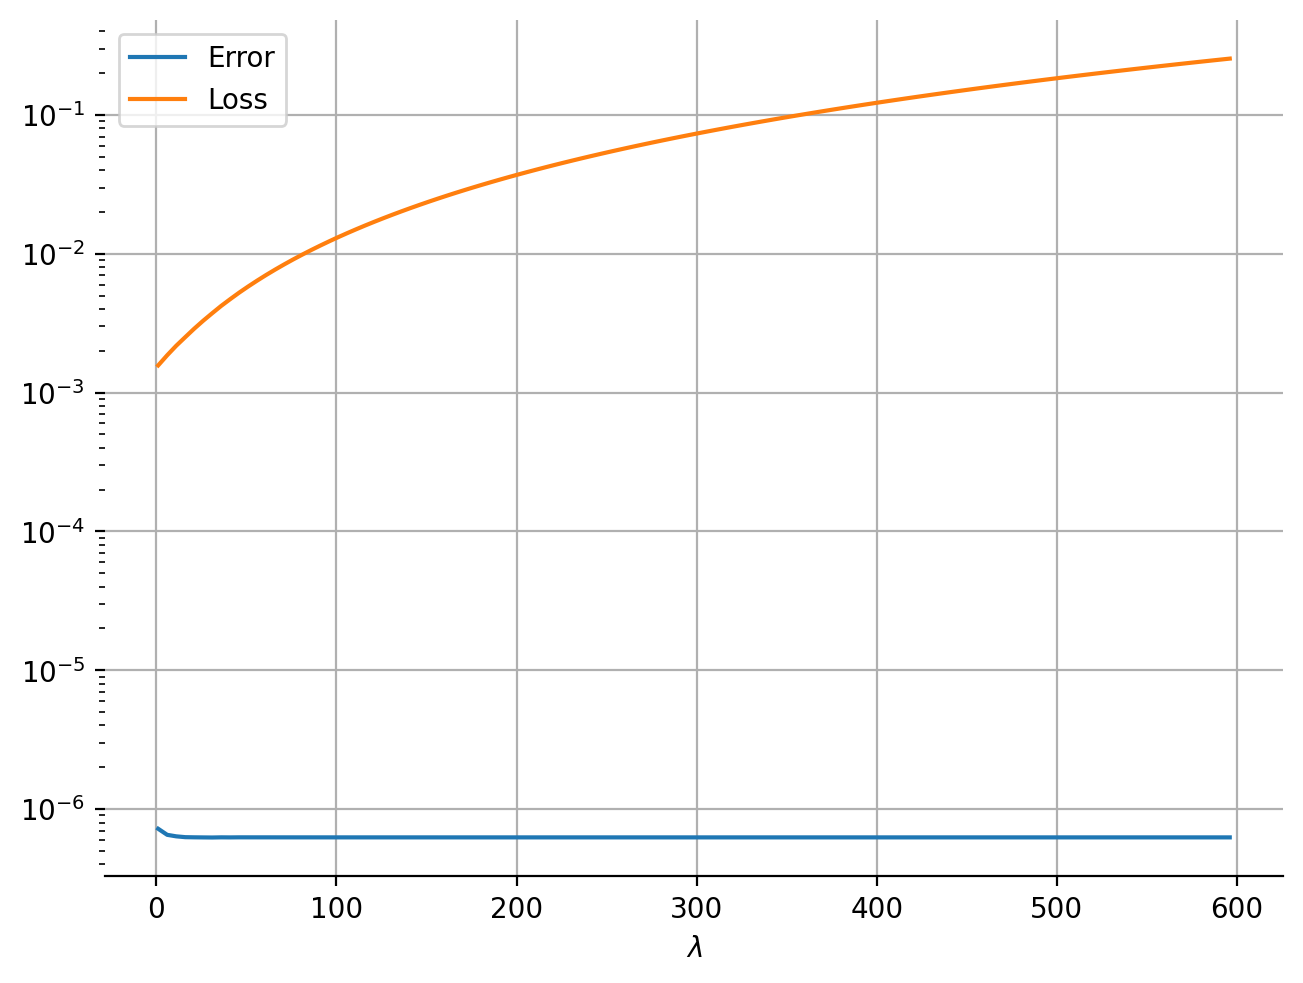

In [ ]:
fig, ax = plt.subplots()
ax.plot(C, DATA11, c="C0", label="Error")
ax.plot(C, DATA12, c="C1", label="Loss")

ax.set(
    yscale="log",
    xlabel=r"$\lambda$",
)
ax.grid()
ax.legend()
ax.spines[["top", "right", "left"]].set_visible(False)
pass

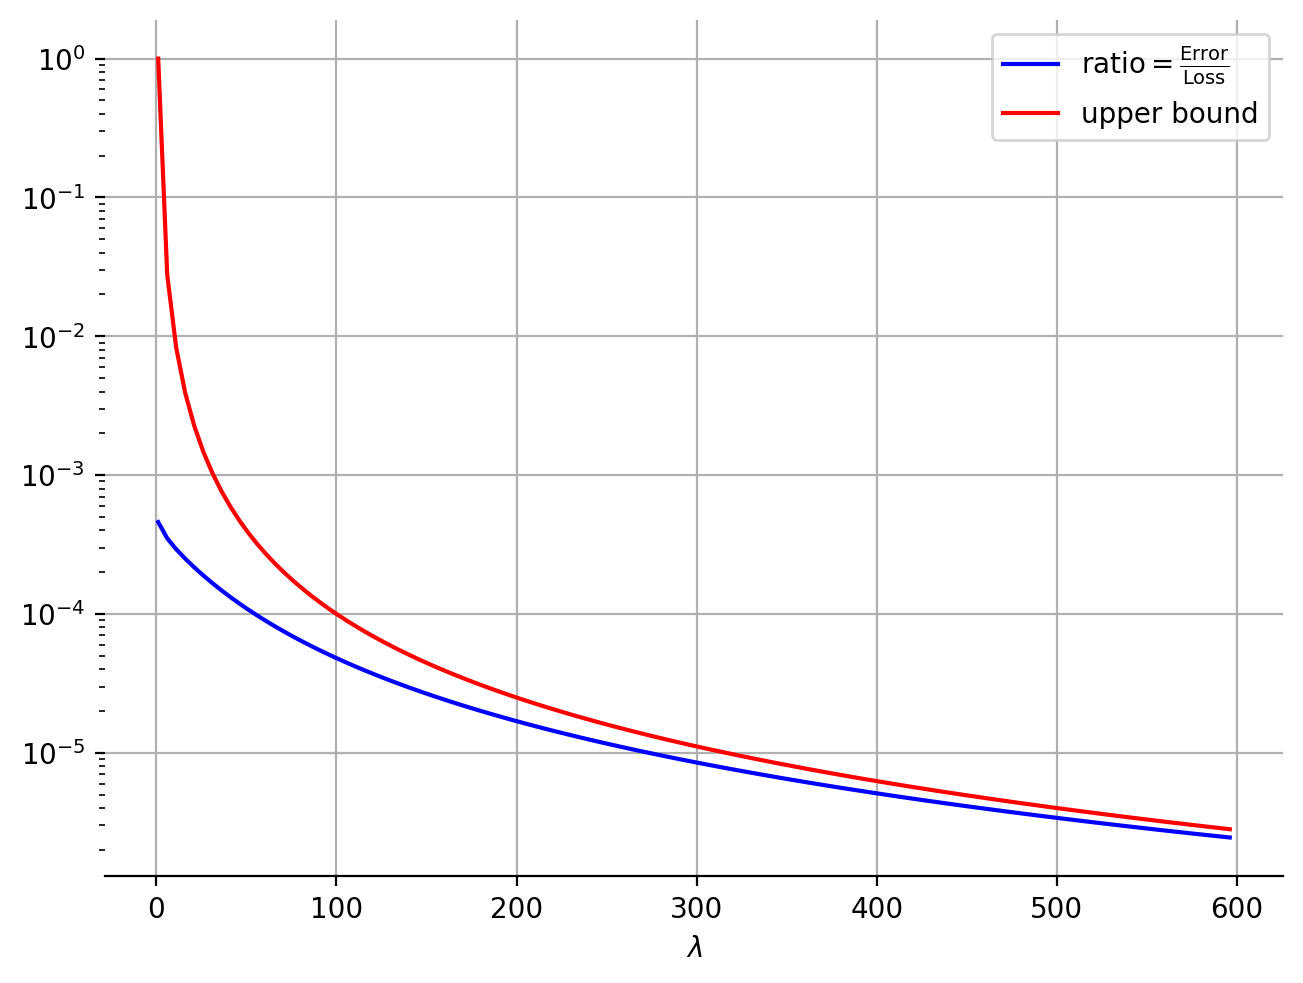

In [ ]:
fig, ax = plt.subplots()
ax.plot(C, RATIO1, c="blue", label=r"ratio$=\frac{\sf Error}{\sf Loss}$")
ax.plot(C, 1/(C)**2, c="red", label="upper bound")

ax.set(
    yscale="log",
    xlabel=r"$\lambda$"
)
ax.grid()
ax.legend()
ax.spines[["top", "right", "left"]].set_visible(False)
pass